### Gene Expression ODEs

### Canonical building block: 
#### It’s a 2-state linear cascade (mRNA → protein), the backbone for larger gene circuits and for adding regulation (Hill functions, promoter switching, maturation chains).

## Constitutive expression (with optional growth dilution)
### $$\dot{m} = k_{tx} - (\gamma_m+\mu)m$$
### $$\dot{p} =  k_{tl}m - (\gamma_p + \mu)p$$

#### Hyperparameters
##### $k_{tx} [mRNA · time^{−1}]$ — transcription rate.
##### $k_{tl} [(protein).mRNA · time^{−1}]$ - translation rate.
##### $γm[time^{−1}]$ — mRNA decay rate
##### $γp[time^{−1}]$ — protein decay rate
##### $μ [time^{−1}]$ — growth/dilution rate (set 0 for non-growing cells or include to see how growth throttles levels)

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import mplhelv

In [2]:
def genex(t, mp, params):
    ktx, gammam, mu, ktl, gammap = params
    m, p = mp
    return [ktx - (gammam + mu)*m, ktl*m - (gammap + mu)*p] #Returning the first derivatives

In [3]:
m0 = 5
p0 = 2
time = (0, 1)
ktx = 2
ktl = 4
mu = 7
gammap = 1
gammam = 0.9
params = (ktx, gammam, mu, ktl, gammap)

sol = solve_ivp(genex, time, [m0, p0], args=(params,),
                method='RK45', dense_output=True,
                rtol=1e-6, atol=1e-9, max_step=np.inf)

In [4]:
# From analytical solution
m_star = ktx/(gammam + mu)
p_star = (ktl*m_star)/(gammap + mu)
tau_m = 1.0/(gammam + mu)
tau_p = 1.0/(gammap + mu)

In [5]:
t = np.linspace(*time, 4000)
mdot, pdot = sol.sol(t)

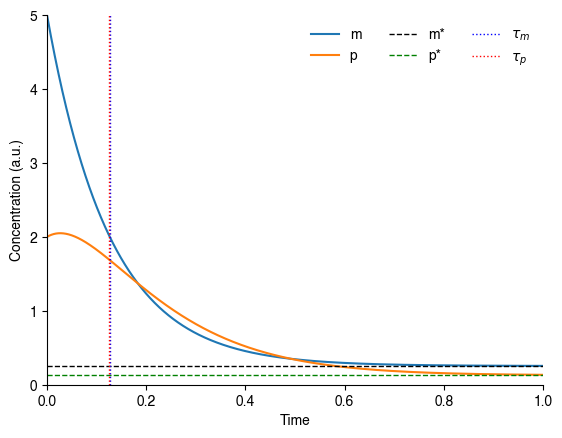

In [6]:
fig, axs = plt.subplots()
axs.plot(t, mdot, label='m')
axs.plot(t, pdot, label='p')
axs.set_xlabel("Time")
axs.set_ylabel("Concentration (a.u.)")
axs.axhline(m_star, color='k', linestyle='--', linewidth=1, label='m*')
axs.axhline(p_star, color='g', linestyle='--', linewidth=1, label='p*')
axs.axvline(tau_m, color='b', linestyle=':', linewidth=1, label=r'$\tau_m$')
axs.axvline(tau_p, color='r', linestyle=':', linewidth=1, label=r'$\tau_p$')
axs.set_xlim(0, 1)
axs.set_ylim(0, 5)
axs.spines[["top", "right"]].set_visible(False)
axs.legend(frameon=False, ncol=3)

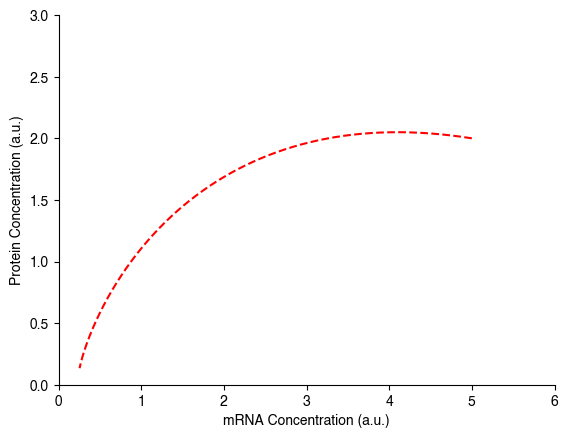

In [14]:
fig, axs = plt.subplots()
axs.plot(mdot, pdot, 'r', linestyle='--')
axs.set_xlabel("mRNA Concentration (a.u.)")
axs.set_ylabel("Protein Concentration (a.u.)")
axs.set_xlim(0, 6)
axs.set_ylim(0, 3)
axs.spines[["top", "right"]].set_visible(False)